### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
salePrice = "SalePrice"

In [6]:
highCorrCols = train.corr()[train.corr().loc[salePrice] >= 0.5].index
highCorrCols

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

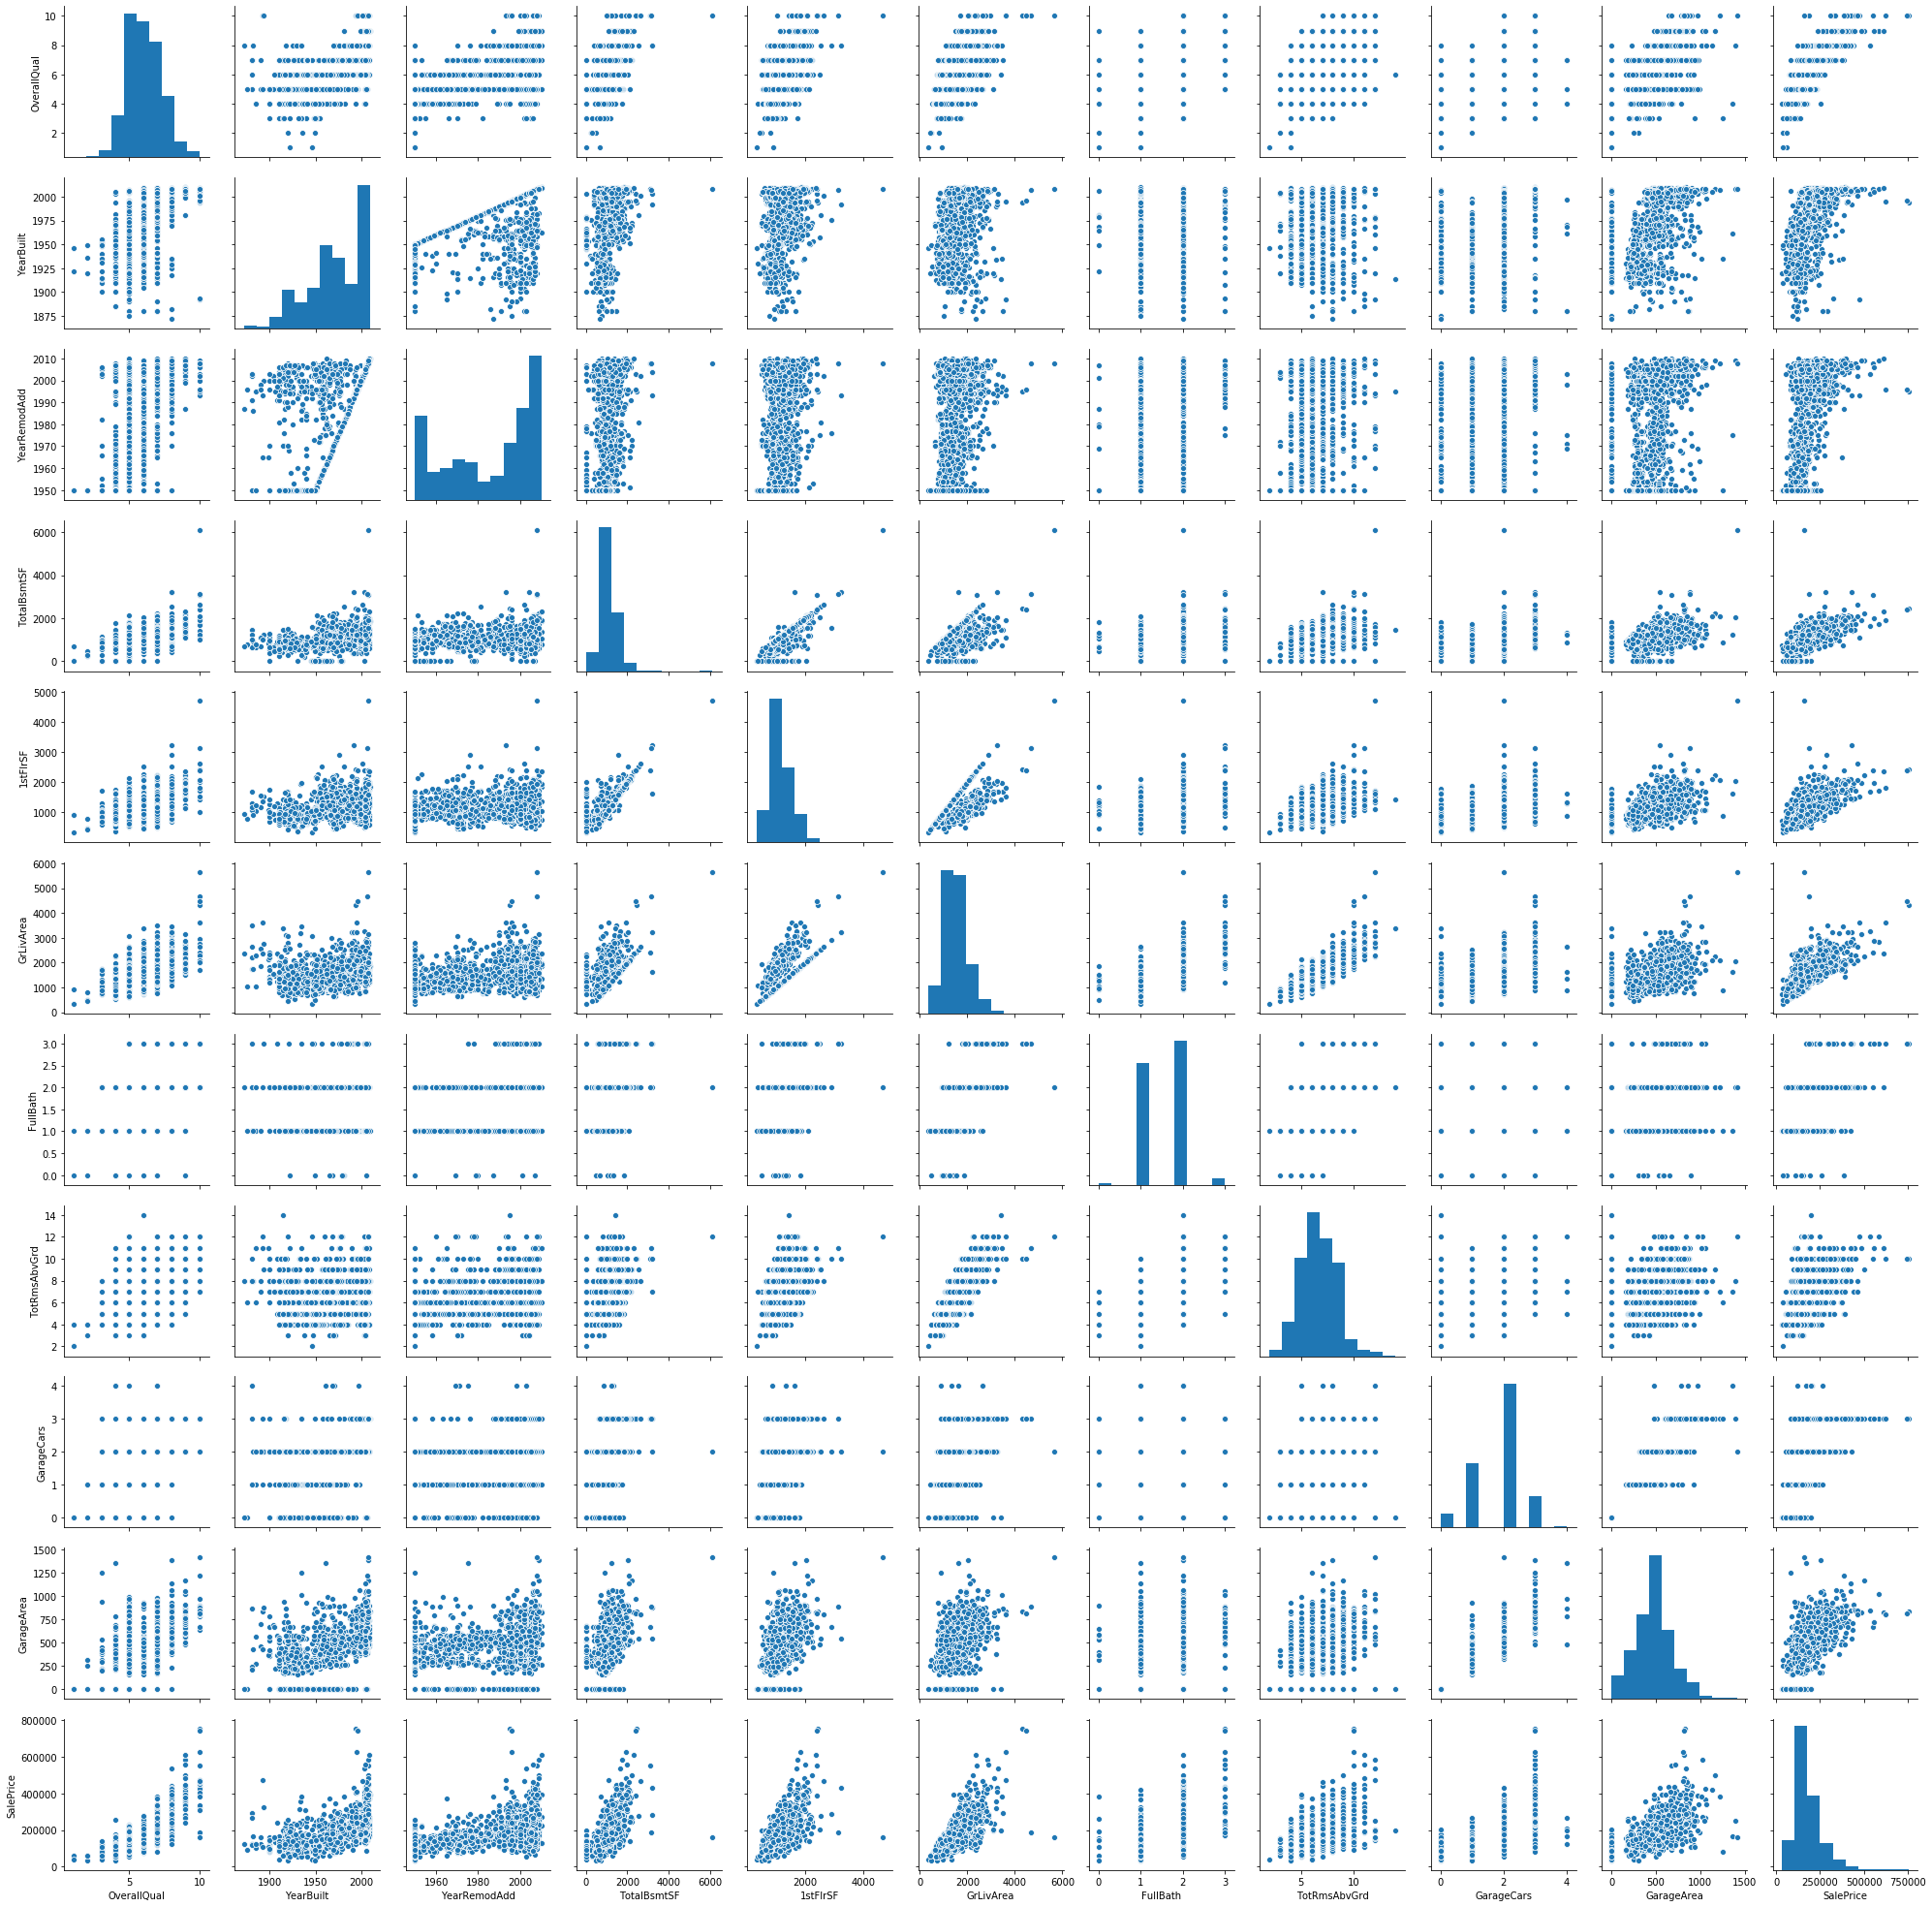

In [7]:
sns.pairplot(data = train[highCorrCols])

In [8]:
highCorrCols = highCorrCols.drop(salePrice)
highCorrCols

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

### Handling missing data

OverallQual

In [9]:
overallQual = "OverallQual"
print(train[overallQual].isnull().sum(), test[overallQual].isnull().sum())

0 0


YearBuilt

In [10]:
yearBuilt = "YearBuilt"
print(train[yearBuilt].isnull().sum(), test[yearBuilt].isnull().sum())

0 0


YearRemodAdd

In [11]:
YearRemodAdd = "YearBuilt"
print(train[YearRemodAdd].isnull().sum(), test[YearRemodAdd].isnull().sum())

0 0


TotalBsmtSF

In [12]:
totalBsmtSF = "TotalBsmtSF"
print(train[totalBsmtSF].isnull().sum(), test[totalBsmtSF].isnull().sum())

0 1


In [13]:
test[totalBsmtSF].fillna(test[totalBsmtSF].dropna().mean(), inplace = True)

1stFlrSF

In [14]:
_1stFlrSF = "1stFlrSF"
print(train[_1stFlrSF].isnull().sum(), test[_1stFlrSF].isnull().sum())

0 0


GrLivArea

In [15]:
grLivArea = 'GrLivArea'
print(train[grLivArea].isnull().sum(), test[grLivArea].isnull().sum())

0 0


FullBath

In [16]:
fullBath = 'FullBath'
print(train[fullBath].isnull().sum(), test[fullBath].isnull().sum())

0 0


TotRmsAbvGrd

In [17]:
totRmsAbvGrd = "TotRmsAbvGrd"
print(train[totRmsAbvGrd].isnull().sum(), test[totRmsAbvGrd].isnull().sum())

0 0


GarageCars

In [18]:
garageCars = "GarageCars"
print(train[garageCars].isnull().sum(), test[garageCars].isnull().sum())

0 1


In [19]:
test[garageCars].fillna(3, inplace = True)

GarageArea

In [20]:
garageArea = "GarageArea"
print(train[garageArea].isnull().sum(), test[garageArea].isnull().sum())

0 1


In [21]:
test[garageArea].fillna(test[garageArea].dropna().mean(), inplace = True)

In [22]:
categoricalCols = []
categoricalCols

[]

In [23]:
objCols = train.select_dtypes(include = ["object"]).columns
objCols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

MSZoning

In [24]:
mSZoning = "MSZoning"
print(train[mSZoning].isnull().sum(), test[mSZoning].isnull().sum())

0 4


In [25]:
test[mSZoning].fillna("RL", inplace = True)

In [26]:
categoricalCols.append(mSZoning)

Street and Alley

In [27]:
street = "Street"
alley = "Alley"
print(train[street].isnull().sum(), test[street].isnull().sum())
print(train[alley].isnull().sum(), test[alley].isnull().sum())

0 0
1369 1352


In [28]:
train[alley].fillna("N/A", inplace = True)
test[alley].fillna("N/A", inplace = True)

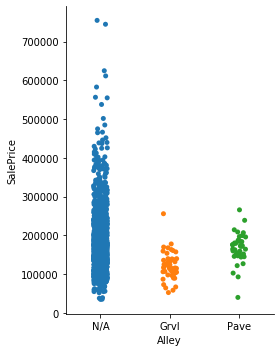

In [29]:
sns.catplot(x = alley, y = salePrice, data = train, height = 5, aspect = 0.8)

LotShape

In [30]:
lotShape = "LotShape"
print(train[lotShape].isnull().sum(), test[lotShape].isnull().sum())

0 0


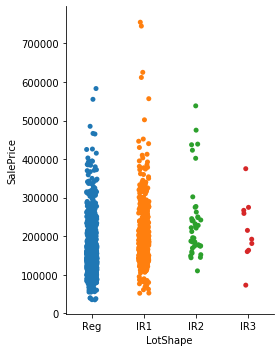

In [31]:
sns.catplot(x = lotShape, y = salePrice, data = train, height = 5, aspect = 0.8)

LandContour

In [32]:
landContour = "LandContour"
print(train[landContour].isnull().sum(), test[landContour].isnull().sum())

0 0


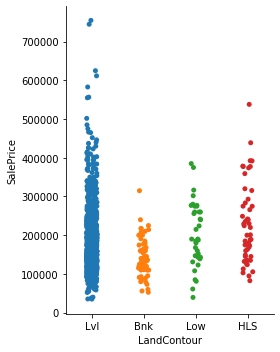

In [33]:
sns.catplot(x = landContour, y = salePrice, data = train, height = 5, aspect = 0.8)

In [34]:
train[landContour].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities

In [35]:
utilities = "Utilities"
print(train[utilities].isnull().sum(), test[utilities].isnull().sum())

0 2


In [36]:
train[utilities].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig

In [37]:
lotConfig = "LotConfig"
print(train[lotConfig].isnull().sum(), test[lotConfig].isnull().sum())

0 0


In [38]:
train[lotConfig].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [39]:
objCols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

LandSlope

In [40]:
landSlope = "LandSlope"
print(train[landSlope].isnull().sum(), test[landSlope].isnull().sum())

0 0


In [41]:
train[landSlope].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood

In [42]:
neighborhood = "Neighborhood"
print(train[neighborhood].isnull().sum(), test[neighborhood].isnull().sum())

0 0


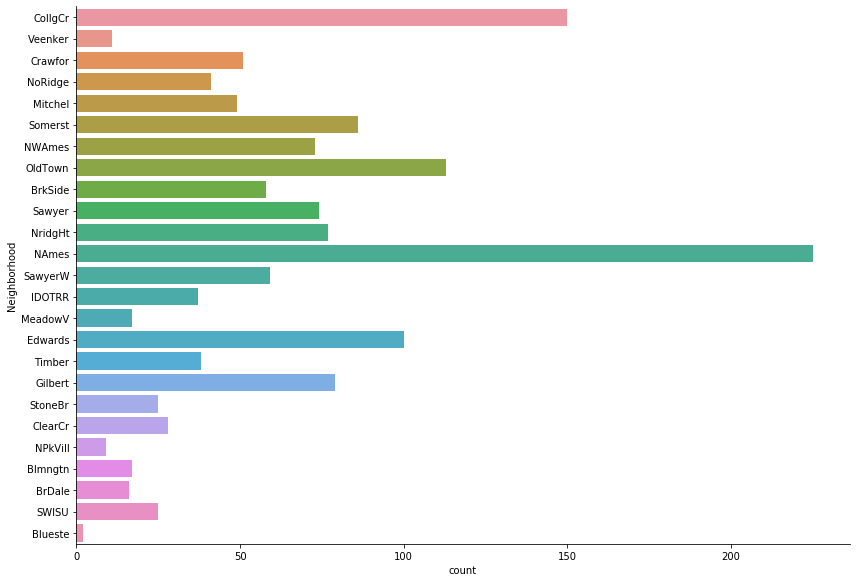

In [43]:
train[neighborhood].value_counts()
sns.catplot(y = neighborhood, data = train, kind = "count", height = 8, aspect = 1.5)

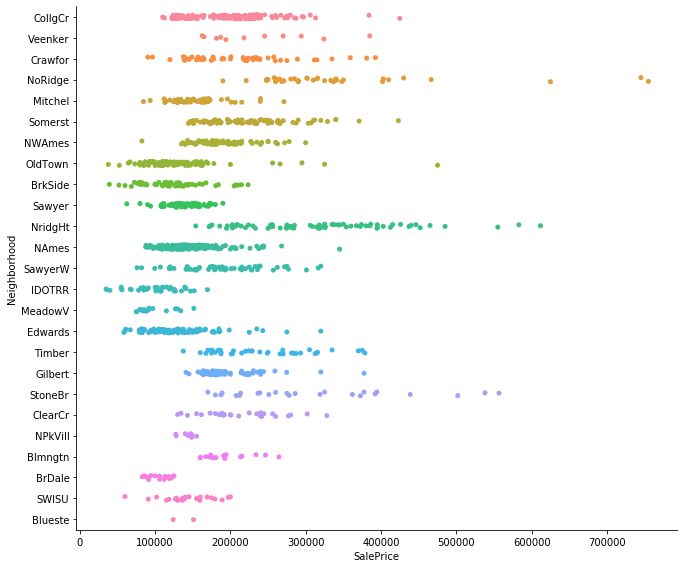

In [44]:
sns.catplot(y = neighborhood, x = salePrice, data = train, height = 8, aspect = 1.2)

In [45]:
categoricalCols.append(neighborhood)

Condition1 and Condition2

In [46]:
condition1 = "Condition1"
condition2 = "Condition2"
print(train[condition1].isnull().sum(), test[condition1].isnull().sum())
print(train[condition2].isnull().sum(), test[condition2].isnull().sum())

0 0
0 0


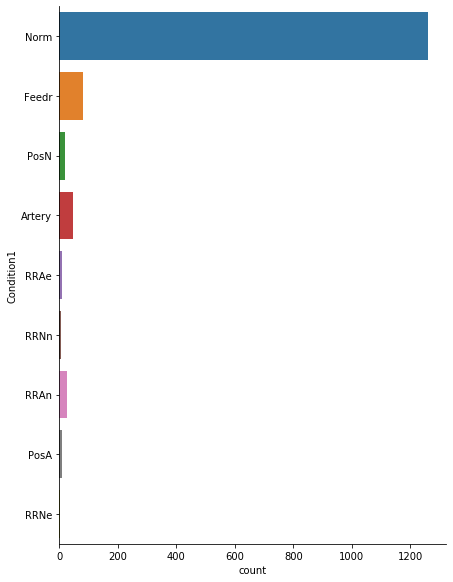

In [47]:
sns.catplot(y = condition1, data = train, kind = "count", height = 8, aspect = 0.8)

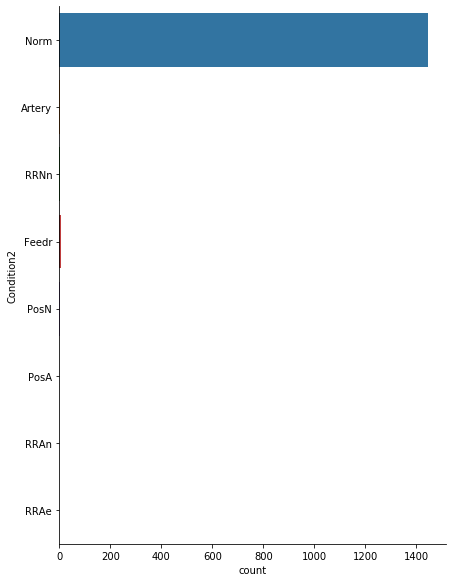

In [48]:
sns.catplot(y = condition2, data = train, kind = "count", height = 8, aspect = 0.8)

BldgType and HouseStyle

In [49]:
bldgType = "BldgType"
houseStyle = "HouseStyle"
print(train[bldgType].isnull().sum(), test[bldgType].isnull().sum())
print(train[bldgType].isnull().sum(), test[bldgType].isnull().sum())

0 0
0 0


In [50]:
train[bldgType].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [51]:
train[houseStyle].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [52]:
train.loc[train[houseStyle].isin(["1.5Fin", "SLvl", "SFoyer", "1.5Unf", "2.5Unf", "2.5Fin"]), houseStyle] = "Others"
test.loc[test[houseStyle].isin(["1.5Fin", "SLvl", "SFoyer", "1.5Unf", "2.5Unf", "2.5Fin"]), houseStyle] = "Others"

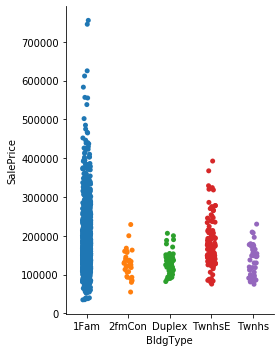

In [53]:
sns.catplot(x = bldgType, y = salePrice, data = train, height = 5, aspect = 0.8)

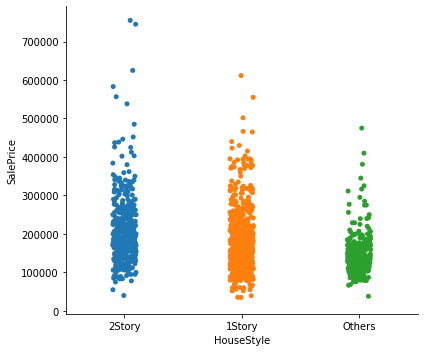

In [54]:
sns.catplot(x = houseStyle, y = salePrice, data = train, height = 5, aspect = 1.2)

In [55]:
categoricalCols.append(houseStyle)

In [56]:
objCols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [57]:
roofStyle = "RoofStyle"
roofMatl = "RoofMatl"
print(train[roofStyle].isnull().sum(), test[roofStyle].isnull().sum())
print(train[roofMatl].isnull().sum(), test[roofMatl].isnull().sum())

0 0
0 0


In [58]:
train[roofStyle].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [59]:
train[roofMatl].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [60]:
exterior1st = "Exterior1st"
exterior2nd = "Exterior2nd"
exterQual = "ExterQual"
exterCond = "ExterCond"
print(train[exterior1st].isnull().sum(), test[exterior1st].isnull().sum())
print(train[exterior2nd].isnull().sum(), test[exterior2nd].isnull().sum())
print(train[exterQual].isnull().sum(), test[exterQual].isnull().sum())
print(train[exterCond].isnull().sum(), test[exterCond].isnull().sum())

0 1
0 1
0 0
0 0


In [61]:
test[exterior1st].fillna("Others", inplace = True)
test[exterior2nd].fillna("Others", inplace = True)

In [62]:
train[exterior1st].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [63]:
train.loc[train[exterior1st].isin(["CemntBd", "BrkFace", "WdShing", "Stucco", "AsbShng", "BrkComm", "Stone", "ImStucc", "CBlock", "AsphShn"]), exterior1st] = "Others"
test.loc[test[exterior1st].isin(["CemntBd", "BrkFace", "WdShing", "Stucco", "AsbShng", "BrkComm", "Stone", "ImStucc", "CBlock", "AsphShn"]), exterior1st] = "Others"

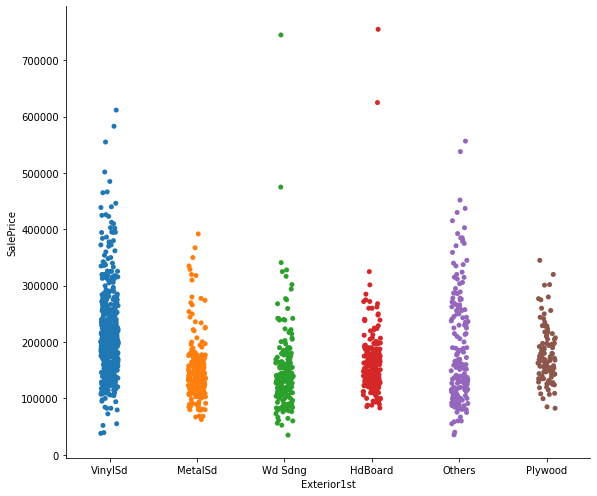

In [64]:
sns.catplot(y = salePrice, x = exterior1st, data = train, height = 7, aspect = 1.2)

In [65]:
train[exterior2nd].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [66]:
exterior2ndToMerge = train[exterior2nd].value_counts().index.drop(["VinylSd", "MetalSd", "HdBoard", "Plywood"])
exterior2ndToMerge

Index(['Wd Sdng', 'CmentBd', 'Wd Shng', 'Stucco', 'BrkFace', 'AsbShng',
       'ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock'],
      dtype='object')

In [67]:
train.loc[train[exterior2nd].isin(exterior2ndToMerge), exterior2nd] = "Others"
test.loc[test[exterior2nd].isin(exterior2ndToMerge), exterior2nd] = "Others"

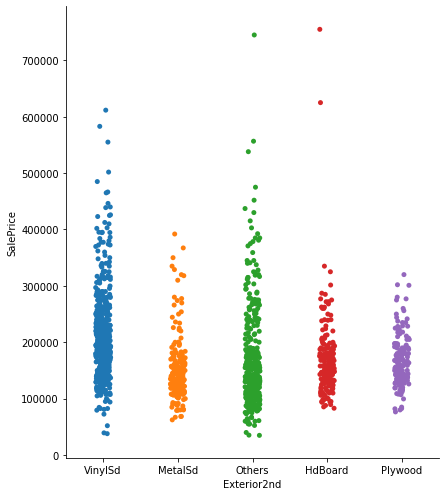

In [68]:
sns.catplot(y = salePrice, x = exterior2nd, data = train, height = 7, aspect = 0.9)

In [69]:
categoricalCols.extend([exterior1st, exterior2nd])
categoricalCols

['MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd']

In [70]:
train[exterQual].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

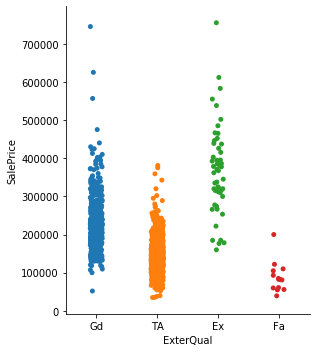

In [71]:
sns.catplot(y = salePrice, x = exterQual, data = train, height = 5, aspect = 0.9)

In [72]:
categoricalCols.append(exterQual)
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual']

In [73]:
train[exterCond].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

MasVnrType

In [74]:
masVnrType = "MasVnrType"
print(train[masVnrType].isnull().sum(), test[masVnrType].isnull().sum())

8 16


In [75]:
train[masVnrType].fillna("BrkCmn", inplace = True)
test[masVnrType].fillna("BrkCmn", inplace = True)

In [76]:
train[masVnrType].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      23
Name: MasVnrType, dtype: int64

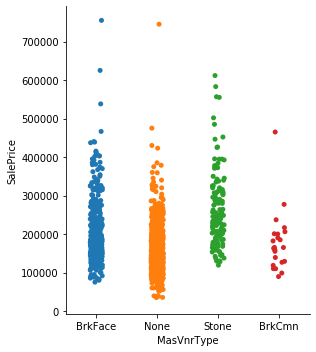

In [77]:
sns.catplot(y = salePrice, x = masVnrType, data = train, height = 5, aspect = 0.9)

In [78]:
categoricalCols.append(masVnrType)
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType']

In [79]:
foundation = "Foundation"
print(train[foundation].isnull().sum(), test[foundation].isnull().sum())

0 0


In [80]:
train.loc[train[foundation].isin(["Slab", "Stone", "Wood"]), foundation] = "Others"
test.loc[test[foundation].isin(["Slab", "Stone", "Wood"]), foundation] = "Others"

In [81]:
train[foundation].value_counts()

PConc     647
CBlock    634
BrkTil    146
Others     33
Name: Foundation, dtype: int64

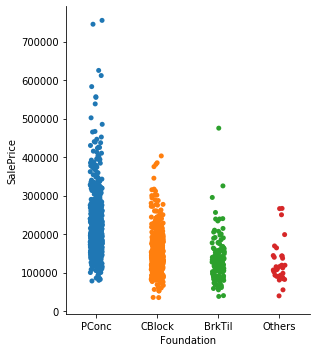

In [82]:
sns.catplot(y = salePrice, x = foundation, data = train, height = 5, aspect = 0.9)

In [83]:
categoricalCols.append(foundation)
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation']

In [84]:
objCols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2

In [85]:
bsmtQual = "BsmtQual"
bsmtCond = "BsmtCond"
bsmtExposure = "BsmtExposure"
bsmtFinType1 = "BsmtFinType1"
bsmtFinType2 = "BsmtFinType2"
print(train[bsmtQual].isnull().sum(), test[bsmtQual].isnull().sum())
print(train[bsmtCond].isnull().sum(), test[bsmtCond].isnull().sum())
print(train[bsmtExposure].isnull().sum(), test[bsmtExposure].isnull().sum())
print(train[bsmtFinType1].isnull().sum(), test[bsmtFinType1].isnull().sum())
print(train[bsmtFinType2].isnull().sum(), test[bsmtFinType2].isnull().sum())

37 44
37 45
38 44
37 42
38 42


In [86]:
def fillWithNA(data, col):
    data[col].fillna("N/A", inplace = True)

In [87]:
fillWithNA(train, bsmtQual)
fillWithNA(train, bsmtCond)
fillWithNA(train, bsmtExposure)
fillWithNA(train, bsmtFinType1)
fillWithNA(train, bsmtFinType2)
fillWithNA(test, bsmtQual)
fillWithNA(test, bsmtCond)
fillWithNA(test, bsmtExposure)
fillWithNA(test, bsmtFinType1)
fillWithNA(test, bsmtFinType2)

In [88]:
train[bsmtFinType2].value_counts()

Unf    1256
Rec      54
LwQ      46
N/A      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

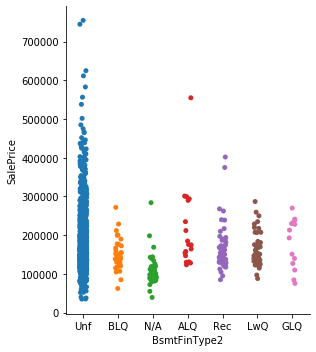

In [89]:
sns.catplot(y = salePrice, x = bsmtFinType2, data = train, height = 5, aspect = 0.9)

In [90]:
categoricalCols.extend([bsmtQual, bsmtExposure, bsmtFinType1])
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1']

Heating and HeatingQC

In [91]:
def printMissingData(col):
    print(train[col].isnull().sum(), test[col].isnull().sum())

In [92]:
heating = "Heating"
heatingQC = "HeatingQC"
printMissingData(heating)
printMissingData(heatingQC)

0 0
0 0


In [93]:
train[heatingQC].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

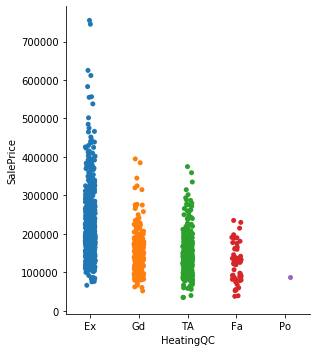

In [94]:
sns.catplot(y = salePrice, x = heatingQC, data = train, height = 5, aspect = 0.9)

In [95]:
categoricalCols.extend([heatingQC])
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC']

In [96]:
objCols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

CentralAir

In [97]:
centralAir = "CentralAir"
printMissingData(centralAir)

0 0


In [98]:
train[centralAir].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

Electrical

In [99]:
electrical = "Electrical"
printMissingData(electrical)

1 0


In [100]:
train[electrical].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

KitchenQual

In [101]:
kitchenQual = "KitchenQual"
printMissingData(kitchenQual)

0 1


In [102]:
test[kitchenQual].fillna("Fa", inplace = True)

In [103]:
train[kitchenQual].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

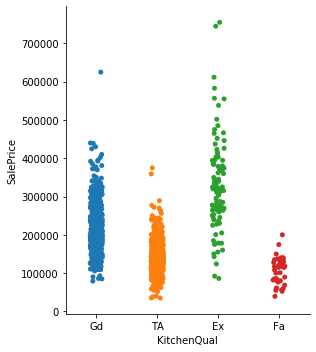

In [104]:
sns.catplot(y = salePrice, x = kitchenQual, data = train, height = 5, aspect = 0.9)

In [105]:
categoricalCols.extend([kitchenQual])
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual']

Functional

In [106]:
functional = "Functional"
printMissingData(functional)

0 2


In [107]:
train[functional].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

FireplaceQu

In [108]:
fireplaceQu = "FireplaceQu"
printMissingData(fireplaceQu)

690 730


In [109]:
fillWithNA(train, fireplaceQu)
fillWithNA(test, fireplaceQu)

In [110]:
train[fireplaceQu].value_counts()

N/A    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

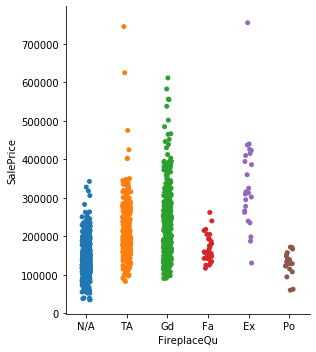

In [111]:
sns.catplot(y = salePrice, x = fireplaceQu, data = train, height = 5, aspect = 0.9)

In [112]:
categoricalCols.extend([fireplaceQu])
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu']

GarageType, GarageFinish, GarageQual and GarageCond

In [113]:
garageType = "GarageType"
garageFinish = "GarageFinish"
garageQual = "GarageQual"
garageCond = "GarageCond"
printMissingData(garageType)
printMissingData(garageFinish)
printMissingData(garageQual)
printMissingData(garageCond)

81 76
81 78
81 78
81 78


In [114]:
fillWithNA(train, garageType)
fillWithNA(train, garageFinish)
fillWithNA(train, garageQual)
fillWithNA(train, garageCond)
fillWithNA(test, garageType)
fillWithNA(test, garageFinish)
fillWithNA(test, garageQual)
fillWithNA(test, garageCond)

In [115]:
train[garageCond].value_counts()

TA     1326
N/A      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

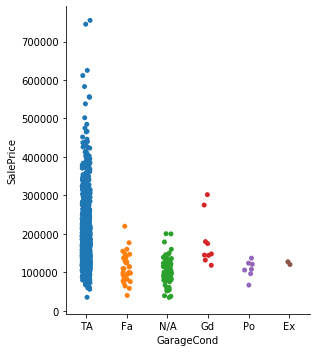

In [116]:
sns.catplot(y = salePrice, x = garageCond, data = train, height = 5, aspect = 0.9)

In [117]:
categoricalCols.extend([garageType, garageFinish])
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

PavedDrive

In [118]:
pavedDrive = "PavedDrive"
printMissingData(pavedDrive)

0 0


In [119]:
train[pavedDrive].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

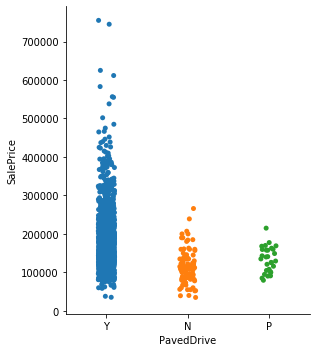

In [120]:
sns.catplot(y = salePrice, x = pavedDrive, data = train, height = 5, aspect = 0.9)

In [121]:
categoricalCols.extend([pavedDrive])
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PavedDrive']

PoolQC

In [122]:
poolQC = "PoolQC"
printMissingData(poolQC)

1453 1456


In [123]:
train[poolQC].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

Fence

In [124]:
fence = "Fence"
printMissingData(fence)

1179 1169


In [125]:
train[fence].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [126]:
fillWithNA(train, fence)
fillWithNA(test, fence)

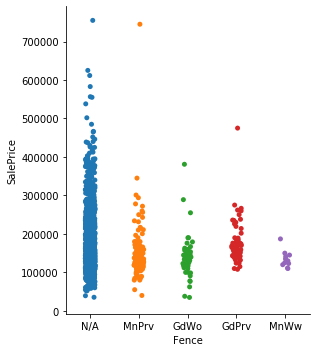

In [127]:
sns.catplot(y = salePrice, x = fence, data = train, height = 5, aspect = 0.9)

MiscFeature

In [128]:
miscFeature = "MiscFeature"
printMissingData(miscFeature)

1406 1408


In [129]:
fillWithNA(train, miscFeature)
fillWithNA(test, miscFeature)

In [130]:
train[miscFeature].value_counts()

N/A     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

SaleType

In [131]:
saleType = "SaleType"
printMissingData(miscFeature)

0 0


In [132]:
train[saleType].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

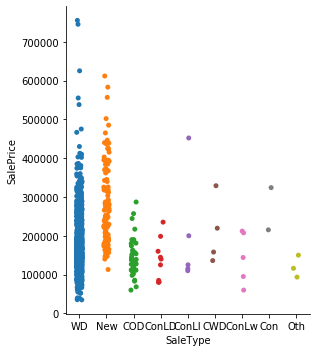

In [133]:
sns.catplot(y = salePrice, x = saleType, data = train, height = 5, aspect = 0.9)

In [134]:
categoricalCols.extend([saleType])
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType']

SaleCondition

In [135]:
saleCondition = "SaleCondition"
printMissingData(saleCondition)

0 0


In [136]:
train[saleCondition].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

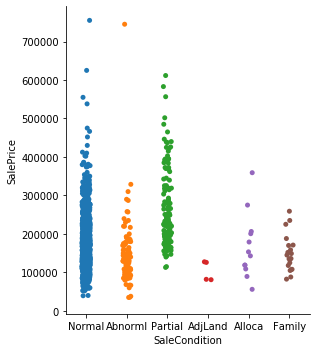

In [137]:
sns.catplot(y = salePrice, x = saleCondition, data = train, height = 5, aspect = 0.9)

In [138]:
categoricalCols.extend([saleCondition])
categoricalCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [139]:
useCols = categoricalCols.copy()
useCols.extend(list(highCorrCols))
useCols

['MSZoning',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [140]:
testId = test["Id"]
newTest = test[useCols].copy()

In [141]:
X = train[useCols].copy()
y = train[salePrice]

In [142]:
X.head()

,MSZoning,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,ExterQual,MasVnrType,Foundation,BsmtQual,BsmtExposure,...,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,RL,CollgCr,2Story,VinylSd,VinylSd,Gd,BrkFace,PConc,Gd,No,...,7,2003,2003,856,856,1710,2,8,2,548
1,RL,Veenker,1Story,MetalSd,MetalSd,TA,None,CBlock,Gd,Gd,...,6,1976,1976,1262,1262,1262,2,6,2,460
2,RL,CollgCr,2Story,VinylSd,VinylSd,Gd,BrkFace,PConc,Gd,Mn,...,7,2001,2002,920,920,1786,2,6,2,608
3,RL,Crawfor,2Story,Wd Sdng,Others,TA,None,BrkTil,TA,No,...,7,1915,1970,756,961,1717,1,7,3,642
4,RL,NoRidge,2Story,VinylSd,VinylSd,Gd,BrkFace,PConc,Gd,Av,...,8,2000,2000,1145,1145,2198,2,9,3,836


In [143]:
newTest.head()

,MSZoning,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,ExterQual,MasVnrType,Foundation,BsmtQual,BsmtExposure,...,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,RH,NAmes,1Story,VinylSd,VinylSd,TA,None,CBlock,TA,No,...,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,RL,NAmes,1Story,Wd Sdng,Others,TA,BrkFace,CBlock,TA,No,...,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,RL,Gilbert,2Story,VinylSd,VinylSd,TA,None,PConc,Gd,No,...,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,RL,Gilbert,2Story,VinylSd,VinylSd,TA,BrkFace,PConc,TA,No,...,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,RL,StoneBr,1Story,HdBoard,HdBoard,Gd,None,PConc,Gd,No,...,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


In [144]:
for col in categoricalCols:
    newCols = pd.get_dummies(X[col], prefix = col, drop_first = True, )
    X.drop(col, axis = 1, inplace = True)
    X = pd.concat([X, newCols], axis = 1)
    testNewCols = pd.get_dummies(newTest[col], prefix = col, drop_first = True)
    newTest.drop(col, axis = 1, inplace = True)
    newTest = pd.concat([newTest, testNewCols], axis = 1)
    if len(newCols.columns) != len(testNewCols.columns):
        print(len(newCols.columns), len(testNewCols.columns), col)

### Split data

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

### Import model

Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
lrModelPrediction = lrModel.predict(X_test)

Random forest regressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
rfModel = RandomForestRegressor(n_estimators = 5000)
rfModel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
rfModelPrediction = rfModel.predict(X_test)

Hyperparameter Tuning

In [178]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, None],
    'max_features': [2, 3, "auto"],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [1000, 5000]
}

rfModel = RandomForestRegressor()
rfModel_Tuned = GridSearchCV(estimator = rfModel, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [179]:
rfModel_Tuned.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 43.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

Support vector machine

In [153]:
from sklearn.svm import SVC

In [154]:
svcModel = SVC()
svcModel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [155]:
svcModelPrediction = svcModel.predict(X_test)

### Evaluation

In [156]:
from sklearn import metrics

Mean absolute error

In [157]:
print(metrics.mean_absolute_error(y_test, lrModelPrediction))
print(metrics.mean_absolute_error(y_test, rfModelPrediction))
print(metrics.mean_absolute_error(y_test, svcModelPrediction))

21559.740020424546
20123.959628057695
60820.927385892115


Mean squared error

In [158]:
print(metrics.mean_squared_error(y_test, lrModelPrediction))
print(metrics.mean_squared_error(y_test, rfModelPrediction))
print(metrics.mean_squared_error(y_test, svcModelPrediction))

1276727662.6034656
1259903276.1880553
8797378842.126556


Root mean squared error

In [159]:
print(np.sqrt(metrics.mean_squared_error(y_test, lrModelPrediction)))
print(np.sqrt(metrics.mean_squared_error(y_test, rfModelPrediction)))
print(np.sqrt(metrics.mean_squared_error(y_test, svcModelPrediction)))

35731.32606836004
35495.116230096435
93794.34333757317


### Make submission

In [162]:
subPrediction = lrModel.predict(newTest)

In [165]:
subPrediction = rfModel.predict(newTest)

In [168]:
subPrediction = svcModel.predict(newTest)

In [180]:
subPrediction = rfModel_Tuned.predict(newTest)

In [181]:
submission = pd.DataFrame(data = {
    "Id": testId,
    salePrice: subPrediction
})

In [182]:
submission.to_csv("submission", index = False)